<a href="https://colab.research.google.com/github/Tyton25/machine_learning/blob/master/sterlings_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

## Regression

In [3]:
# X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0])
# y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0])
# y = tf.range(3, 40, 3, dtype=tf.float32)
X = tf.range(-100, 100, 3, dtype=tf.float32)
y = X + 10
# X, y

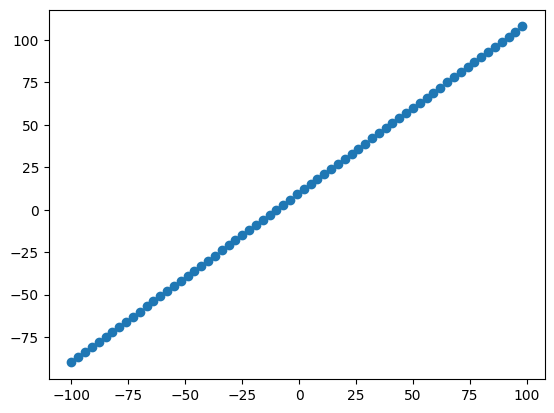

In [4]:
plt.scatter(X,y)

In [5]:
from os import name
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer1"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer2"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer3"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer4"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer5"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              # optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000, verbose=0)
# model.fit(X, y, epochs=100, verbose=0)

In [6]:
model.predict([20.0])

1/1 [==============================] - 0s 138ms/step


array([[30.170033]], dtype=float32)

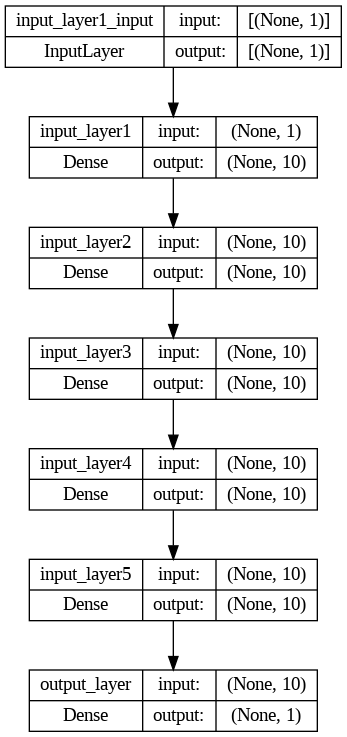

In [7]:
plot_model(model=model, show_shapes=True)

In [8]:
x_length = len(X)
x_length

67

In [9]:
x_idx = int(x_length * 0.8)
x_idx

53

In [10]:
X_train = X[:x_idx]
y_train = y[:x_idx]

In [11]:
X_test = X[x_idx:]
y_test = y[x_idx:]

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(53, 14, 53, 14)

In [13]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 23ms/step


array([[ 69.48244 ],
       [ 72.50647 ],
       [ 75.53051 ],
       [ 78.55453 ],
       [ 81.57856 ],
       [ 84.6026  ],
       [ 87.62662 ],
       [ 90.650665],
       [ 93.6747  ],
       [ 96.69874 ],
       [ 99.722755],
       [102.74678 ],
       [105.77082 ],
       [108.79484 ]], dtype=float32)

In [14]:
y_test

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([ 69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.,
       102., 105., 108.], dtype=float32)>

In [15]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="g", label="Training data")

  plt.scatter(test_data, test_labels, c="b", label="Test data")

  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend();

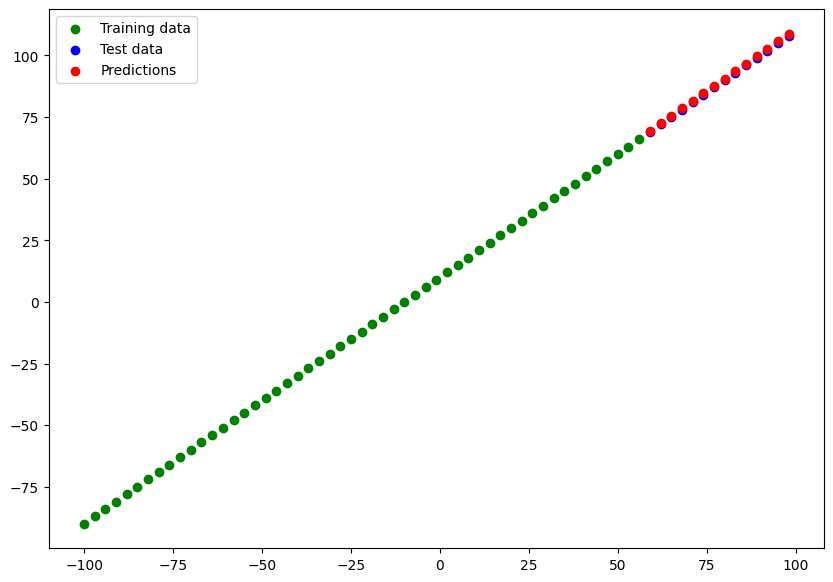

In [16]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [17]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 190ms/step - loss: 0.6386 - mae: 0.6386


[0.6386440992355347, 0.6386440992355347]

In [18]:
mae = tf.keras.losses.mae(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.6386441>

In [19]:
mse = tf.keras.losses.mse(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.41725084>

In [20]:
def mae(test_vals, pred_vals):
  return tf.keras.losses.mae(y_true=test_vals,
                             y_pred=tf.squeeze(pred_vals)).numpy()

In [21]:
def mse(test_vals, pred_vals):
  return tf.keras.losses.mse(y_true=test_vals,
                             y_pred=tf.squeeze(pred_vals)).numpy()

***Buile Model_1

In [22]:
# Set seed
tf.random.set_seed(42)

# 1. Create Model_1 for Evaluation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile Model_1
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Train Model_1
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [23]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 63ms/step


array([[ 65.69267 ],
       [ 68.96377 ],
       [ 72.234856],
       [ 75.50595 ],
       [ 78.77704 ],
       [ 82.04813 ],
       [ 85.31922 ],
       [ 88.59031 ],
       [ 91.861404],
       [ 95.13249 ],
       [ 98.40359 ],
       [101.674675],
       [104.94576 ],
       [108.21686 ]], dtype=float32)

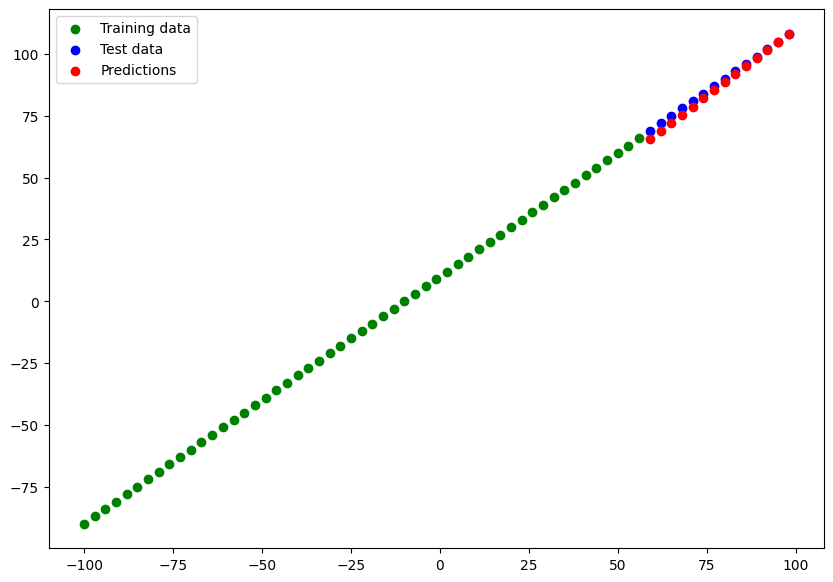

In [24]:
plot_predictions(predictions=y_pred_1)

In [25]:
# Create model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(1.5762138, 3.5819657)

** Build `model_2`
* 2 dense layers trained for 100 epochs

In [26]:
# Set seed
tf.random.set_seed(42)

# 1. Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Train model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [27]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 56ms/step


array([[ 65.586525],
       [ 68.75344 ],
       [ 71.92034 ],
       [ 75.08728 ],
       [ 78.25418 ],
       [ 81.42109 ],
       [ 84.58802 ],
       [ 87.75494 ],
       [ 90.921844],
       [ 94.08877 ],
       [ 97.25568 ],
       [100.42259 ],
       [103.58952 ],
       [106.75643 ]], dtype=float32)

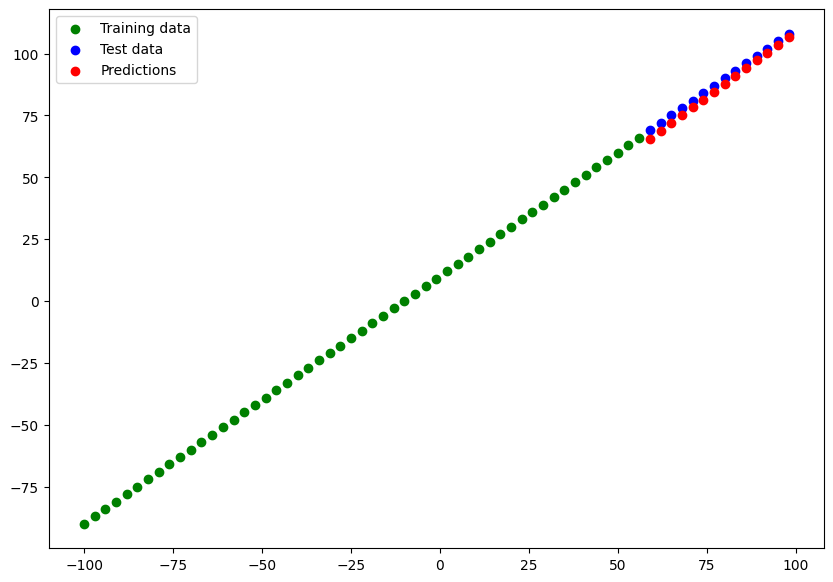

In [28]:
plot_predictions(predictions=y_pred_2)

In [29]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(2.328525, 5.87477)

*** Build `model_3`
* 2 layers trained for 500 epochs

In [30]:
from keras.engine.training import optimizer
# Set seed
tf.random.set_seed(42)

# 1. Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Train model_3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [31]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 94ms/step


array([[ 71.02607 ],
       [ 74.336006],
       [ 77.64595 ],
       [ 80.95589 ],
       [ 84.26582 ],
       [ 87.57577 ],
       [ 90.8857  ],
       [ 94.19564 ],
       [ 97.50558 ],
       [100.81551 ],
       [104.12545 ],
       [107.43539 ],
       [110.74534 ],
       [114.055275]], dtype=float32)

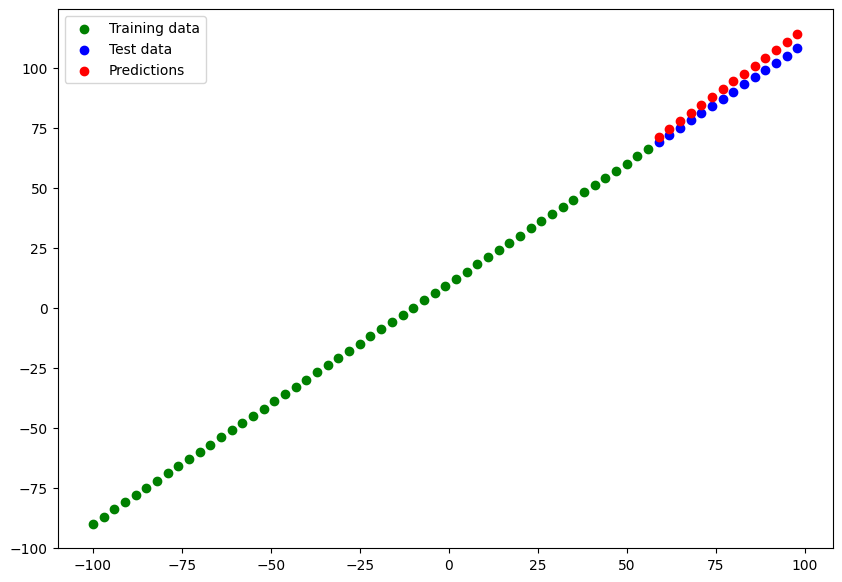

In [32]:
plot_predictions(predictions=y_pred_3)

In [33]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(4.04067, 17.88802)

### Save Models

In [34]:
model_2.save("best_model_SavedModel_format")

*** Compare Results of `Models`

In [35]:
model_2.save("best_model_HDF5_format.h5")

### Load Models

In [36]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compare model_2 predictions with that of loaded_SavedModel_format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 62ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [39]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]
                 ]

results_df = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])

results_df

,Model,MAE,MSE
0,model_1,1.576214,3.581966
1,model_2,2.328525,5.874770
2,model_3,4.040670,17.888020


In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

## Preprocessing Data (Normalization & Standardization)

In [42]:
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # transform all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values
X = insurance_df.drop("charges", axis=1)
y = insurance_df["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [44]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [45]:
# Build a neural network model to train on our normalized data
# 1. set seed
tf.random.set_seed(42)

# 2. Build model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 4. Fit model
insurance_model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [46]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3437.5452 - mae: 3437.5449


[3437.545166015625, 3437.544921875]

In [47]:
y_pred = insurance_model.predict(X_test_normal)
y_pred

9/9 [==============================] - 0s 3ms/step


array([[ 9360.027  ],
       [ 6068.113  ],
       [34367.21   ],
       [ 9254.394  ],
       [22087.234  ],
       [ 5819.902  ],
       [ 1080.2767 ],
       [13554.387  ],
       [ 3538.687  ],
       [10225.737  ],
       [25472.64   ],
       [ 7777.9224 ],
       [ 4259.604  ],
       [30833.146  ],
       [33294.58   ],
       [30503.887  ],
       [10773.318  ],
       [30445.162  ],
       [ 8738.7705 ],
       [28727.13   ],
       [ 3958.4836 ],
       [ 8063.897  ],
       [  682.2415 ],
       [ 3193.4243 ],
       [10939.512  ],
       [11387.129  ],
       [12435.385  ],
       [ 4890.5107 ],
       [ 9977.316  ],
       [  452.88742],
       [ 8361.979  ],
       [11809.695  ],
       [ 2001.8705 ],
       [ 5108.554  ],
       [ 2945.8381 ],
       [ 8893.393  ],
       [ 1877.7638 ],
       [ 7983.2437 ],
       [31395.443  ],
       [26933.162  ],
       [ 3088.6047 ],
       [ 2311.6719 ],
       [11806.519  ],
       [11511.638  ],
       [ 5609.139  ],
       [11

In [48]:
PI = np.pi
EULER = np.e

In [49]:
EULER, EULER**2

(2.718281828459045, 7.3890560989306495)

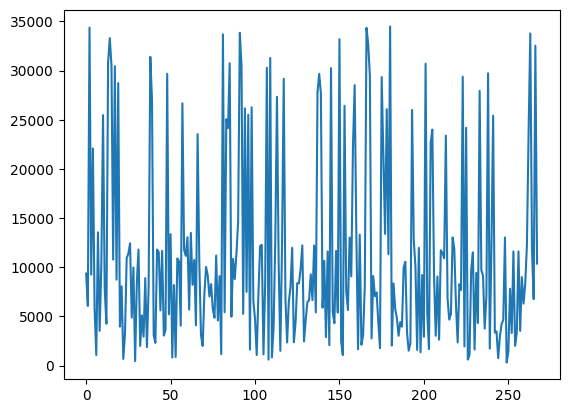

In [50]:
plt.plot(y_pred)

## Classifier

In [103]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Create the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2-D arrays together
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0] > 1):
    print("doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [64]:
from sklearn.datasets import make_circles

n_samples = 1000


X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [70]:
circles = pd.DataFrame({"X": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


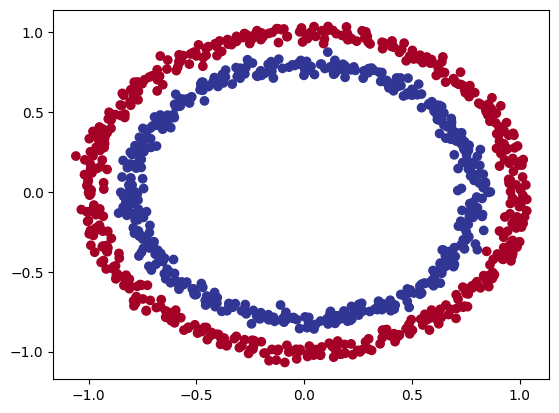

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [75]:
len(X)

1000

In [96]:
X_train, X_test, = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [105]:
# 1. Set seet
tf.random.set_seed(42)

# 2. Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")],
)

# 3. Compile the moedl
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 4. Fit the model
history = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5163
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5663
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.5825
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6988
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7225
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5069 - accuracy: 0.8788
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.9175
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.9600
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9787
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.9962
Epoch 11/

In [106]:
y_pred = model_1.predict(X_test)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[9.9999964e-01],
       [9.9999964e-01],
       [9.9999970e-01],
       [9.9998844e-01],
       [8.3409384e-02],
       [1.0793405e-05],
       [9.9999058e-01],
       [8.0116195e-07],
       [9.9999988e-01],
       [8.7836006e-06],
       [9.9999666e-01],
       [8.3394833e-02],
       [9.9999785e-01],
       [9.9949402e-01],
       [9.9983406e-01],
       [9.9985743e-01],
       [9.9997097e-01],
       [9.9979556e-01],
       [4.4645167e-05],
       [9.9999982e-01],
       [3.8744147e-06],
       [9.9996835e-01],
       [9.9999982e-01],
       [9.9999928e-01],
       [1.5472554e-06],
       [9.9999547e-01],
       [9.9992919e-01],
       [1.7736998e-04],
       [3.5918362e-07],
       [9.9999416e-01],
       [3.6399092e-07],
       [9.9999124e-01],
       [9.9980438e-01],
       [1.2575057e-06],
       [4.4224507e-04],
       [9.9999541e-01],
       [9.9999547e-01],
       [9.9991816e-01],
       [9.9999988e-01],
       [9.9999821e-01],
       [9.9999994e-01],
       [9.993129

313/313 [==============================] - 0s 1ms/step
doing multi-class classification
313/313 [==============================] - 0s 1ms/step
doing multi-class classification


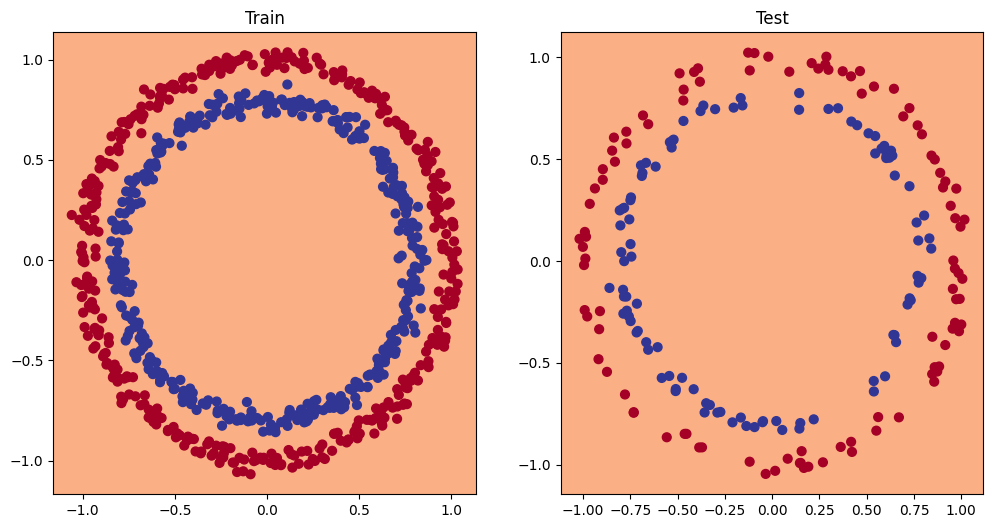

In [109]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()